In [1]:
from DataGen import *
from Helper import *
from Config import Config
from Net import Network
from Plotting import *
from DataHandle import *
config = Config()


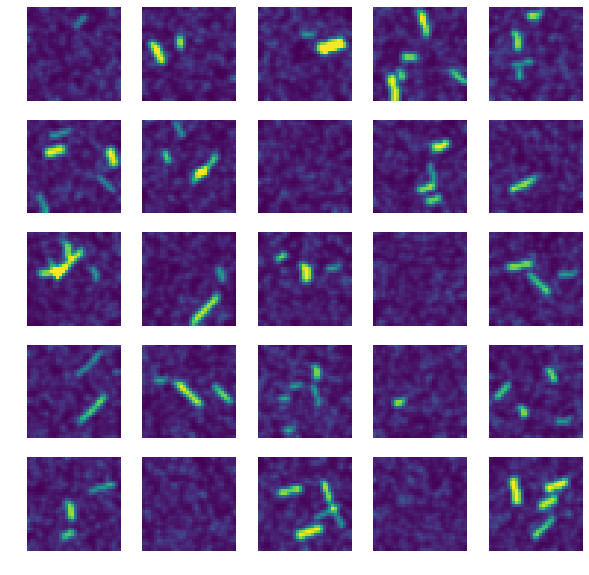

In [2]:
train_data, test_data, train_labels, test_labels = gen_TestTrain();
plot_25_ims()

In [3]:
net = Network()
load = True

if load:
    net.load()
else:
    net.train(train_data, train_labels, 100)
    net.save()

INFO:tensorflow:Restoring parameters from ./checkpts/test_model


In [16]:
datafile = 'Data/1460.npy'

try:
    data = np.load(datafile)
    data = np.clip(data,0,5)/5
    x = 2245
    y = 3250
    c = data[y:3600, x: x+32]
except:
    data = gen_VideoTest()     
    x = 0
    y = 0
    c = data[:,:]

<IPython.core.display.Javascript object>


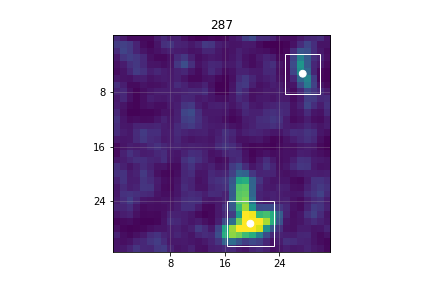

<IPython.core.display.Javascript object>


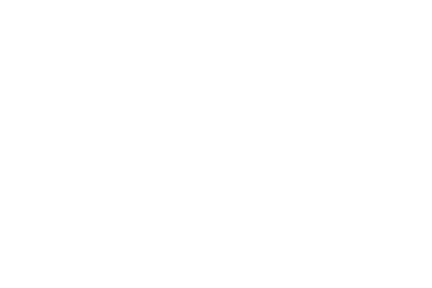

In [17]:
%matplotlib notebook

fig, ax = plt.subplots(1,1)
plt.ion()
fig.show()

buffer = ImgBuffer()
for n in range(np.shape(c)[0]-config.L):
    plt.cla()
    currIm = np.reshape(c[n:n+config.L,:], [1, config.L, config.L])
    pred = net.predict(currIm) 

    boxes = process_pred(pred)

    buffer.update_timer()
    buffer.process_new(boxes, (y+n), x)
    buffer.process_existing()
    
    plt.cla()
    ax.imshow(c[n:n+config.L,:], vmax = 1, vmin = 0)
    plt.xticks(np.arange(config.f, config.L, config.f))
    plt.yticks(np.arange(config.f, config.L, config.f))
    plt.axis("on")
    plt.title(n)
    plt.grid(True, alpha = .3)
    for z in range(len(boxes)):
        cx, cy, w, h = boxes[z]
        ax.add_patch(patch.Circle((cy,cx), 0.5, ec = 'w', fc = 'w'))
        ax.add_patch(patch.Rectangle((cy-h/2, cx-w/2),\
            h, w, ec='w', fc='none'))  
    
    fig.canvas.draw() 
buffer.clear_buffer()


15.253696084022522 5.590664803981781 12.809898614883423 12.283387064933777


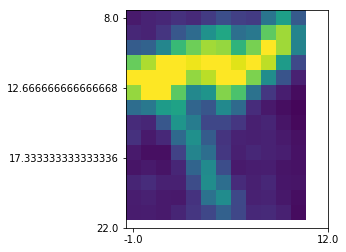

49.45181095600128 3.882692337036133 6.908706426620483 7.6404709815979


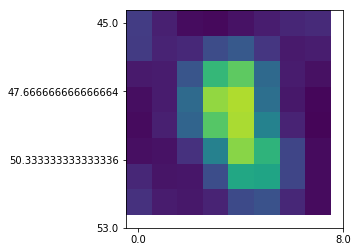

177.05381834506989 5.789246439933777 9.252444505691528 7.248650312423706


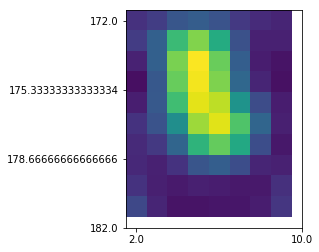

175.5624462366104 15.618322014808655 284.1231415271759 34.0636031627655


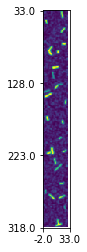

198.94902431964874 15.618322014808655 237.34998536109924 34.0636031627655


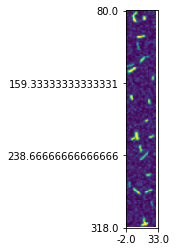

246.8933961391449 15.526309132575989 141.46124172210693 32.71950554847717


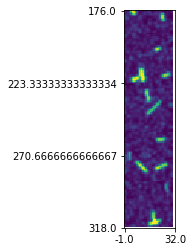

287.76431107521057 15.623936533927917 59.719411849975586 32.47341513633728


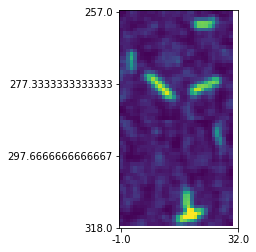

In [24]:
%matplotlib inline

for i in buffer.final_array:
    cx, cy, w, h = (corners_to_box(i))
    print(cx,cy,w,h)
    minx, maxx = int(np.floor(cx - w/2)), int(np.ceil(cx + w/2))
    miny, maxy = int(np.floor(cy - h/2)), int(np.ceil(cy + h/2))
    thisimg = data[max(minx,0): maxx, max(miny,0):maxy]
    plt.imshow(thisimg, vmax = 1, vmin = 0)
    plt.xticks(np.linspace(0,maxy-miny,2), np.linspace(miny, maxy,2))
    plt.yticks(np.linspace(0,maxx-minx,4), np.linspace(minx, maxx,4))
    plt.show()

